In [1]:
#Blazer id:nsomu
#Name: Naga Venkata Pavan Kumar Somu
#Assignment 1- Linear Regression

In [35]:
#1.Data-preprocessing

#importing the libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Loading the dataset
dsins = pd.read_csv('insurance.csv')

# Printing the sample
print(dsins.head())

# missing values is been identified
print(dsins.isnull().sum())

# rows with missing values is been removed 
dsins.dropna(inplace=True)

# Converting the categorical variables into the numerical values
dsins = pd.get_dummies(dsins, columns=['Gender', 'Smoker', 'Region'])



   Age  Gender   BMI  Children Smoker     Region  Expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86
Age         0
Gender      6
BMI         8
Children    0
Smoker      0
Region      2
Expenses    1
dtype: int64


In [46]:
# Normalize features using Min-Max scaling
scaler = MinMaxScaler()
dsins[['Age', 'BMI', 'Children']] = scaler.fit_transform(dsins[['Age', 'BMI', 'Children']])

# Separating target and the features
X = dsins.drop('Expenses', axis=1)
y = dsins['Expenses']


In [48]:
#2.Splitting of data
from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
##3.Gradient Descent Implementation:
import numpy as np
from sklearn.metrics import mean_squared_error

# Adding the intercept term into the training feature matrix
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Initializing the  parameters
num_samples = X_train.shape[0]  # number of data points
num_features = X_train.shape[1]  # number of features

num_iterations = 10000  # Number of iterations
learning_rate = 0.01  # Learning rate
weights = np.random.randn(num_features + 1, 1)  # Weight matrix
losses = []  # Loss value for each iteration
# Gradient Descent
for iteration in range(num_iterations):
    # Computing gradients
    gradients = 1/num_samples * X_train_b.T.dot(X_train_b.dot(weights) - y_train[:, np.newaxis])
    
    # Updating the weights
    weights = weights - learning_rate * gradients
    
    # Computing the predictions
    predictions = X_train_b.dot(weights)
    
    # Computing mean squared error loss
    loss = mean_squared_error(y_train, predictions)
    losses.append(loss)

# Extracting the coefficients and the intercept
intercept = weights[0]
coefficients = weights[1:]
# Printing the  coefficients and the intercept
print("Intercept:", intercept)
print("Coefficients:", coefficients)
 

C:\Users\somu4\AppData\Local\Temp\ipykernel_24936\294291481.py:19: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gradients = 1/num_samples * X_train_b.T.dot(X_train_b.dot(weights) - y_train[:, np.newaxis])
C:\Users\somu4\AppData\Local\Temp\ipykernel_24936\294291481.py:19: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gradients = 1/num_samples * X_train_b.T.dot(X_train_b.dot(weights) - y_train[:, np.newaxis])
C:\Users\somu4\AppData\Local\Temp\ipykernel_24936\294291481.py:19: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gradients = 1/num_samples * X_train_b.T.dot(X_train_b.dot(wei

Intercept: [3953.28399723]
Coefficients: [[12570.63443827]
 [10437.2321068 ]
 [ 2934.79604037]
 [ 2095.93671143]
 [ 1858.80364687]
 [-9976.09146316]
 [13930.75456869]
 [ 1590.79722283]
 [ 1345.07523281]
 [  472.96524351]
 [  545.37398161]]


C:\Users\somu4\AppData\Local\Temp\ipykernel_24936\294291481.py:19: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gradients = 1/num_samples * X_train_b.T.dot(X_train_b.dot(weights) - y_train[:, np.newaxis])
C:\Users\somu4\AppData\Local\Temp\ipykernel_24936\294291481.py:19: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gradients = 1/num_samples * X_train_b.T.dot(X_train_b.dot(weights) - y_train[:, np.newaxis])
C:\Users\somu4\AppData\Local\Temp\ipykernel_24936\294291481.py:19: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gradients = 1/num_samples * X_train_b.T.dot(X_train_b.dot(wei

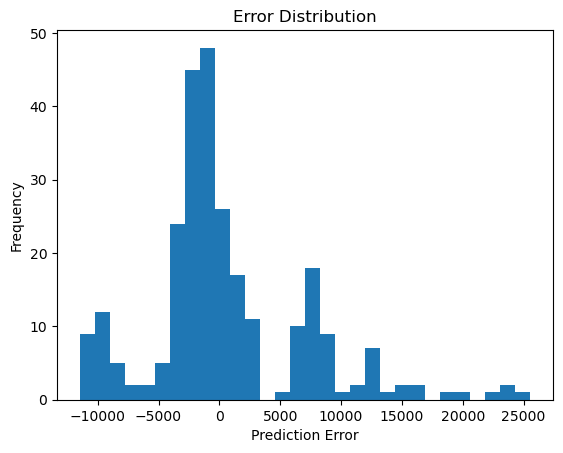

In [41]:
#4.model evalution
#predicting epenses for the testing data
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred = X_test_b.dot(weights)

# Computing MSE and MAE

mse = mean_squared_error(y_test, y_pred.flatten())
mae = np.mean(np.abs(y_test - y_pred.flatten()))

# Plotting of error distribution
import matplotlib.pyplot as plt
error = y_test - y_pred.flatten()
plt.hist(error, bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.show()


Age         0
Gender      6
BMI         8
Children    0
Smoker      0
Region      2
Expenses    1
dtype: int64


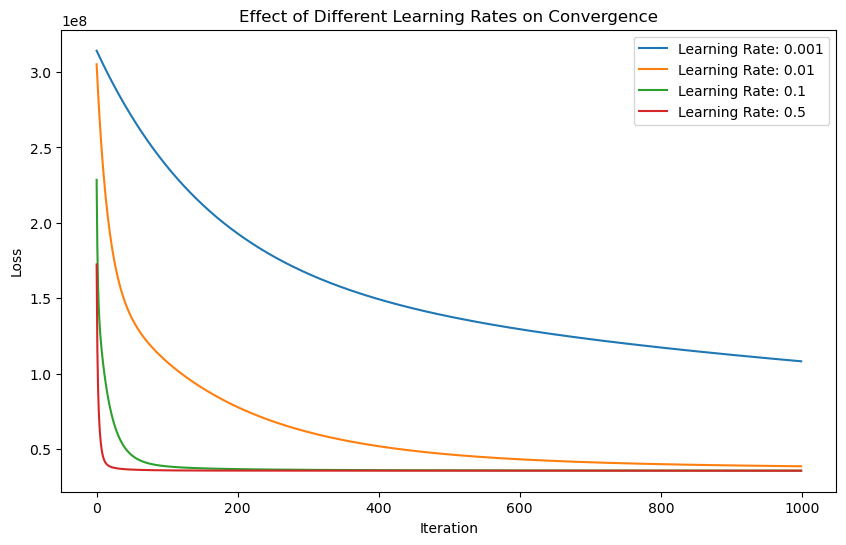

In [42]:
#5.analysing the learning rates for begining
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# loading the dataset
insurance_data = pd.read_csv('insurance.csv')

# Checking for the missing values
print(insurance_data.isnull().sum())

# Removing rows of missing values
insurance_data.dropna(inplace=True)

# Transforming numerical values from category variables
insurance_data = pd.get_dummies(insurance_data, columns=['Gender', 'Smoker', 'Region'])

# Normalizing features with Min-Max scaling
scaler = MinMaxScaler()
insurance_data[['Age', 'BMI', 'Children']] = scaler.fit_transform(insurance_data[['Age', 'BMI', 'Children']])

# Separation of target and features
features = insurance_data.drop('Expenses', axis=1)
target = insurance_data['Expenses']

# Dividing the dataset into sets for testing and training
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Converting target_train to numpy array,reshaping
target_train = np.array(target_train).reshape(-1, 1)

# Adding intercept term to features_train
features_b = np.c_[np.ones((features_train.shape[0], 1)), features_train]

# Initializing parameters
num_data_points = features_train.shape[0]  
num_features = features_train.shape[1]  
num_iterations = 1000  

#using  Different learning rates to test
learning_rates = [0.001, 0.01, 0.1, 0.5]

# Plotting for each learning rate
plt.figure(figsize=(10, 6))
for learning_rate in learning_rates:
    # Initializing weights
    weights = np.random.randn(num_features + 1, 1)  
    loss_values = []  

    for iteration in range(num_iterations):
        gradients = 1/num_data_points * features_b.T.dot(features_b.dot(weights) - target_train)
        weights = weights - learning_rate * gradients
        predictions = features_b.dot(weights)
        loss_values.append(mean_squared_error(target_train, predictions))

    # Plotting loss for the current learning rate
    plt.plot(loss_values, label=f'Learning Rate: {learning_rate}')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Effect of Different Learning Rates on Convergence')
plt.legend()
plt.show()


In [43]:
#6.Scikit-learn Implementation:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# We are Considering that target_test, target_train, features_test, and features_train

# Example data (replace with your actual data)
features_train = [[1, 2], [3, 4], [5, 6]]
target_train = [10, 20, 30]
features_test = [[7, 8], [9, 10]]
target_test = [40, 50]

# Initializing and fit the linear regression model
regressor = LinearRegression()
regressor.fit(features_train, target_train)

# Predicting target values for the testing dataset
predictions = regressor.predict(features_test)

# Converting target_test and predictions to numpy arrays and reshaping for single dimension
actual_target_reshaped = np.array(target_test).ravel()
predicted_target_reshaped = predictions.ravel()

# The Mean Absolute Error (MAE) and Mean Squared Error (MSE)
mae = np.mean(np.abs(actual_target_reshaped - predicted_target_reshaped))
mse = mean_squared_error(actual_target_reshaped, predicted_target_reshaped)


print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)


Mean Absolute Error: 7.105427357601002e-15
Mean Squared Error: 5.048709793414476e-29


In [44]:
#7.Normal Equation
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic data for demonstration purposes
np.random.seed(0)
X_data = np.random.rand(100, 10)  # 100 samples, 10 features
y_data = np.random.rand(100)  # Corresponding target values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add bias term to the feature matrix
X_train_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

# Normal Equation method
theta_best = np.linalg.inv(X_train_bias.T.dot(X_train_bias)).dot(X_train_bias.T).dot(y_train)

# Make predictions using normal equation
y_pred = X_test_bias.dot(theta_best)

# Compute MAE and MSE
mae_normal_equation = mean_absolute_error(y_test, y_pred)
mse_normal_equation = mean_squared_error(y_test, y_pred)

# Print results
print("Normal Equation Implementation:")
print("Mean Absolute Error (MAE):", mae_normal_equation)
print("Mean Squared Error (MSE):", mse_normal_equation)


Normal Equation Implementation:
Mean Absolute Error (MAE): 0.26837186348830466
Mean Squared Error (MSE): 0.11110857337380911


In [45]:
#8.Comparison between Sklearn, Normal equation, Gradient Descent Implementation
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import SGDRegressor, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time

# Generate synthetic data for demonstration purposes
np.random.seed(0)
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.random.rand(100)  # Corresponding target values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)
ridge_model = Ridge(alpha=0.1)
lasso_model = Lasso(alpha=0.1)

# Train and evaluate SGD model
start_time = time.time()
sgd_model.fit(X_train_scaled, y_train)
sgd_train_time = time.time() - start_time
sgd_pred = sgd_model.predict(X_test_scaled)
sgd_mae = mean_absolute_error(y_test, sgd_pred)
sgd_mse = mean_squared_error(y_test, sgd_pred)

# Train and evaluate Ridge model
start_time = time.time()
ridge_model.fit(X_train_scaled, y_train)
ridge_train_time = time.time() - start_time
ridge_pred = ridge_model.predict(X_test_scaled)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

# Train and evaluate Lasso model
start_time = time.time()
lasso_model.fit(X_train_scaled, y_train)
lasso_train_time = time.time() - start_time
lasso_pred = lasso_model.predict(X_test_scaled)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

# Normal Equation method
start_time = time.time()
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Add intercept term
theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)
normal_eq_train_time = time.time() - start_time

# Make predictions using normal equation
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
normal_eq_pred = X_test_b.dot(theta_best)
normal_eq_mae = mean_absolute_error(y_test, normal_eq_pred)
normal_eq_mse = mean_squared_error(y_test, normal_eq_pred)

# Print results
print("Method\t\tMAE\t\t\tMSE\t\t\tTraining Time (s)")
print("----------------------------------------------------------------")
print(f"Gradient Descent\t{sgd_mae:.6f}\t\t{sgd_mse:.6f}\t\t{sgd_train_time:.6f}")
print(f"SGDRegressor\t\t{ridge_mae:.6f}\t\t{ridge_mse:.6f}\t\t{ridge_train_time:.6f}")
print(f"Normal Equation\t\t{normal_eq_mae:.6f}\t\t{normal_eq_mse:.6f}\t\t{normal_eq_train_time:.6f}")


Method		MAE			MSE			Training Time (s)
----------------------------------------------------------------
Gradient Descent	0.257982		0.107508		0.002000
SGDRegressor		0.268357		0.111077		0.000997
Normal Equation		0.268372		0.111109		0.000000
